In [ ]:
import os
import pickle
import warnings
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
from numpy import mean, std
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
cwd = os.getcwd()
csv_path = f'{cwd}/drive/MyDrive/tmp/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(csv_path)
df_cleaned = df.copy()
test_size = 0.2
random_state = 43

In [7]:
df_cleaned.head(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


In [8]:
df_cleaned.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
target = "Diabetes_012"
features = [col for col in list(df_cleaned.columns) if col != target]
# remove unuseful features
unused_features = [
    "HighBP",
    "HighChol",
    "AnyHealthcare",
    "NoDocbcCost",
    "MentHlth",
    "PhysHlth",
    "DiffWalk",
    "Education",
    "Income"
]
for f in unused_features:
    features.remove(f)

In [12]:
# extract numeric and categorical variables
categorical_features = [col for col in features if (df_cleaned[col].dtype == 'object')]
numeric_features = [col for col in features if col not in categorical_features]

<Axes: xlabel='Diabetes_012', ylabel='Count'>

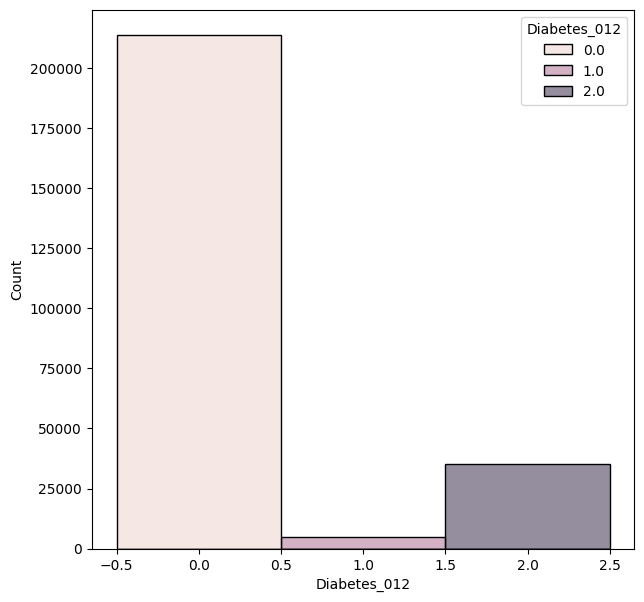

In [13]:
fig = plt.figure(figsize=(7, 7))
sns.histplot(data=df_cleaned, x=target, color ="#8B9D77", label=target, discrete=True, hue=target)

In [26]:
x_train, x_val, y_train, y_val = train_test_split(
    df_cleaned[numeric_features],
    df_cleaned[target],
    test_size=test_size,
    random_state=random_state,
    stratify=df_cleaned[target])

# Save transformed data into csv file
x_train.to_csv('/content/drive/MyDrive/tmp/x_train.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/tmp/y_train.csv', index=False)
x_val.to_csv('/content/drive/MyDrive/tmp/x_val.csv', index=False)
y_val.to_csv('/content/drive/MyDrive/tmp/y_val.csv', index=False)

In [27]:
print(f'x_train shape: {X_train_val.shape}')
print(f"y_train distribution: 1: {sum(y_train_val)} | 0: {len(y_train_val)- sum(y_train_val) }")
print(f'x_val shape: {X_test.shape}')
print(f"y_val distribution: 1: {sum(y_test)} | 0: {len(y_test)- sum(y_test) }")

x_train shape: (202944, 12)
y_train distribution: 1: 60259.0 | 0: 142685.0
x_val shape: (50736, 12)
y_val distribution: 1: 15064.0 | 0: 35672.0


In [29]:
# source: MLAA - Lab 5 - Exercise 3 - Solutions https://colab.research.google.com/drive/1XygeQMupiP8CQSwJQ0f53Zg81rpLJIx2?usp=share_link#scrollTo=I_CsEciog4bA
y_mode = 0
y_base = np.full(y_train.shape, y_mode)
f1_average = 'macro'
baseline_f1 = f1_score(y_train, y_base, average=f1_average)
print('Baseline F1 score', baseline_f1)

Baseline F1 score 0.30482171098261773


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# define common variables
k_folds = 10
scoring = 'f1_macro'
f1_average = 'macro'

In [34]:
# configure the inner cross-validation
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# define the model
random_forest_clf = RandomForestClassifier(random_state=random_state)
# define search space
parameters = {
    'criterion': ('gini', 'entropy', 'log_loss'),
    'n_estimators': range(100, 150, 20),
    'max_depth': range(10, 20, 3),
    'min_samples_split': range(30, 80, 20),
    'min_samples_leaf': range(50, 100, 10),
    'max_features': ('sqrt', 'log2', None),
    'max_samples': [i/10 for i in range(5, 8)],
    'class_weight': ('balanced', 'balanced_subsample')
}
# define search
search = RandomizedSearchCV(
    estimator=random_forest_clf,
    param_distributions=parameters,
    cv=cv_inner,
    scoring=scoring,
    return_train_score=True,
    random_state=34
)
# execute search
result = search.fit(x_train, y_train)
# report progress
print('est=%.3f, cfg=%s' % (result.best_score_, result.best_params_))

est=0.418, cfg={'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_samples': 0.5, 'max_features': 'sqrt', 'max_depth': 19, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=19, max_samples=0.5, min_samples_leaf=50,
                       min_samples_split=50, random_state=43)

Text(0.5, 1.0, 'Confusion matrix on validation dataset. f1_score=0.417.')

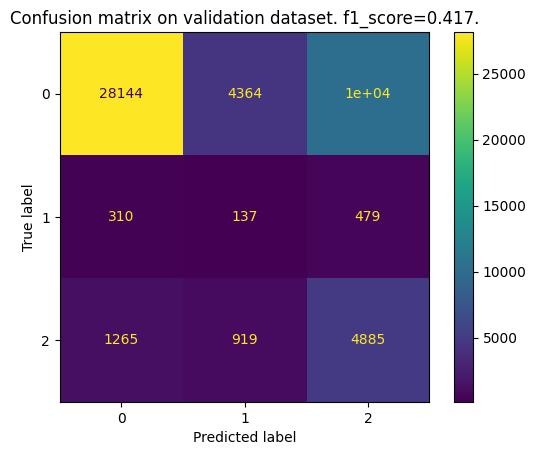

In [39]:
best_model = result.best_estimator_
# get performance metric on training dataset
y_train_pred = best_model.predict(x_train)
f1_train = f1_score(y_train, y_train_pred, average=f1_average)
# evaluate model on the hold out dataset (validation dataset)
y_val_pred = best_model.predict(x_val)
# evaluate the model
f1_val = f1_score(y_val, y_val_pred, average=f1_average)

disp = ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_pred))
disp.plot()
plt.title(f'Confusion matrix on validation dataset. f1_score={round(f1_val, 3)}.')

<Axes: xlabel='importance', ylabel='feature'>

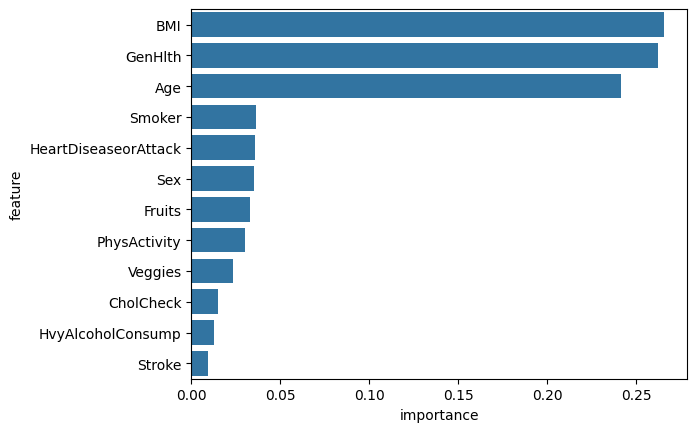

In [41]:
# source: https://stackoverflow.com/questions/69061767/how-to-plot-feature-importance-for-decisiontreeclassifier
feat_importances = pd.DataFrame(
    zip(best_model.feature_importances_, numeric_features),
    columns=['importance', 'feature']
).sort_values(by='importance', ascending=False)
sns.barplot(feat_importances, y='feature', x='importance')

In [42]:
# save the model to disk. source: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = '/content/drive/MyDrive/tmp/diebetes_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [45]:
model = pickle.load(open(filename,'rb'))
predictions = model.predict(df_cleaned[numeric_features].head(1))